In October 2015, a data journalist named Walt Hickey analyzed movie ratings and found strong evidence to suggest that Fandango's rating system was biased and dishonest. His analysis was published in an article on Fivethirtyeight.
Post this article, Fandango's officials promised to fix the bug as soon as possible.


In this project, we will perform data analysis on more recent movie ratings to determine whether there has been any change in Fandango's rating system after Hickey's analysis

In [2]:
import pandas as pd
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Understanding the data
We will work with two samples of movie ratings. The first one collected movie ratings before Hickey's Analysis. The second one was collected after. 

## Reading in the data from two samples

In [3]:
ratings_2015 = pd.read_csv("fandango_score_comparison.csv")
ratings_2015.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
ratings_2016_17 = pd.read_csv("movie_ratings_16_17.csv")
ratings_2016_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


## Isolating relevant columns
We extract the columns related to Fandango ratings from both the samples of movie ratings and store them in new dataframes to make our analysis easier.

In [5]:
fandango_2015 = ratings_2015[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]]
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
fandango_2016_17 = ratings_2016_17[["movie","year","fandango"]]
fandango_2016_17.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's ratings after Hickey's Analysis.
To do this analysis, the population of interest is all the movie ratings on Fandango's website, regardless of the releasing year.

The sampling conditions for the first sample, the data collected before Hickey's Analysis as mentioned in the [readme](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) file are:
- The movie must have atleast 30 fan reviews on Fandango at the time of sampling.
- The movie must have had tickets sale in 2015

This shows that sampling is not random and not quiet respresntative of the population we want to study.The sample is subject to temporal trends as movies in 2015 might be significantly good or bad compared to other years.  

The sampling conditions for our other sample as mentioned in the [readme](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) file are:
- The movie must have been released in 2016 or 2017
- The movie must be popular i.e, have a considerable number of votes and reviews (don't exactly know how many)

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.



# Tweaking our goal
As we now know, the samples are unreprentative of the population we want to study, we are left with two options to proceed further:
- We go out and collect new data for that is more representative of the population we want to study (or)
- We change the goal of our analysis by placing some limitations on it.

Tweaking our goal seems much faster choice compared to collecting new data. Also, it is impossible to collect new samples previous to Hickey's Analysis at this moment in time.

The current goal of our analysis should be changed in such a way that
- The population of interest changes and the samples we currently have become representative of it
- The new goal should be a fairly good proxy for our initial goal. 

Given the criteria, our ** new goal ** now would be 
Whether there has been a change in Fandango's movie ratings of popular movies in 2016 compared to Fandango's movie ratings of popular movies in 2015


With the ** new goal **, we now have two populations that we want to describe and compare with each other
- All Fandango's ratings for popular movies released in 2015
- All Fandango's ratings for popular movies released in 2016 

Here, the term popular is vague and we need to define it with precision before continuing.
Without going out and defining new criteria, we'll use Hickey's criteria of atleast 30 fan revies on Fandango for a movie to be considered "popular"


We need to check now whether all or atleast most sample points in both the samples are movies with more than 30 fan ratings on Fandango's website
The sample fandango_2015 has information about the number of votes each movie got. 

In [7]:
sum(fandango_2015["Fandango_votes"]<30)

0

This shows that all the sample in the dataset fandango_2015 are of the movies that are popular (satisfy our criteria) and are reprentative of the population of interest

On the other hand, the sample fandango_2016_17 doesn't have any column that gives out the information on how many votes or fan ratings that a movie has got. This raise respresentative issues once again. 

To resolve this, we draw a random sample of 10 movie ratings from the fandango_2016_17 sample we have, and check from outside sources the number of fan reviws that the movie has got to see if it satisfies the criteria.

In [8]:
fandango_2016_17.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


After checking from outside sources, we find out that 90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

# Isolating the movies released in 2015 and 2016
If we explore the two data sets further, we'll notice that there are movies with a releasing year different than 2015 or 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016 to perform our analysis.

Let's start with Hickey's data set and isolate only the movies released in 2015. There's no special column for the releasing year. We will need to extract it from the strings in the FILM column and store it in a new column

In [9]:
fandango_2015["Year"] = fandango_2015["FILM"].str[-5:-1]
fandango_2015.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [10]:
fandango_2015["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [11]:
fandango_2015 = fandango_2015[fandango_2015["Year"] == "2015"].copy()

In [12]:
fandango_2015["Year"].value_counts()

2015    129
Name: Year, dtype: int64

In [13]:
fandango_2016_17["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [14]:
fandango_2016_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [15]:
fandango_2016 = fandango_2016_17[fandango_2016_17["year"] == 2016].copy()

In [16]:
fandango_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

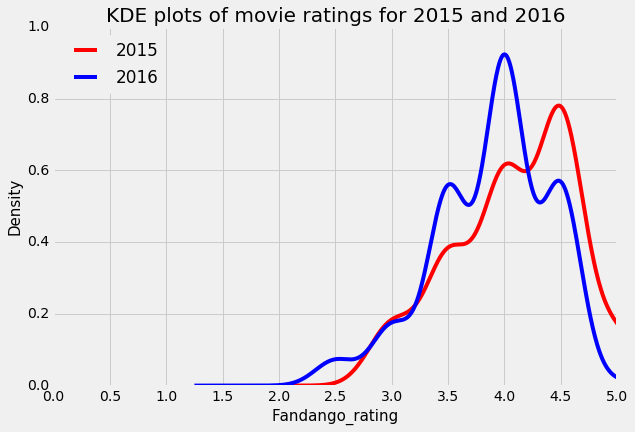

In [17]:
plt.style.use('fivethirtyeight')
fandango_2015["Fandango_Stars"].plot.kde(label = 2015, color = 'r', legend = True,figsize = (9,6))
fandango_2016["fandango"].plot.kde(label = 2016, color = 'b', legend = True)
plt.legend(loc = "upper left")
plt.xlabel("Fandango_rating",fontsize = 15)
plt.ylabel("Density",fontsize = 15)
plt.title("KDE plots of movie ratings for 2015 and 2016",fontsize = 20)
plt.xlim((0,5))
plt.xticks(np.arange(0,5.1,step = 0.5))
plt.show()


From the plots, we can make the following observations:

- Both the kde plots are strongly left skewed. It indicates that most movies on fandango have high ratings
- The kde plot for 2016 seems to have shifted a little left compared to the 2015 one. That is, while the distibution of 2015 sample has its peak occuring at rating value 4.5,the kde plot for 2016 sample is peaks at rating value of 4.0
- The peak of 2016 sample occurs at a lower rating value than the peak of 2015 one. This shows that there has been a change in fandango's movie ratings post Hickey's analysis
- The size of the difference seems to be 0.5 


# Examining relative frequency distribution of 2015 and 2016 ratings

In [24]:
per_2015 = fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100
per_2016 = fandango_2016["fandango"].value_counts(normalize = True).sort_index()*100
print("Relative frequency distribution of 2015 sample" + "\n")
print(per_2015)
print("\n")
print("Relative frequency distribution of 2016 sample" + "\n")
print(per_2016)

Relative frequency distribution of 2015 sample

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64


Relative frequency distribution of 2016 sample

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


We examine and compare the relative frequency distribution of two samples as the sample size is different in two samples and comparing absolute frequencies wouldn't be appropriate in that case. 
By comparing the relative frequency distribution of 2015 and 2016, we can make the following observations:

- The percentage of movies that have very high rating (5.0 stars) in 2015(~7%) is much higher compared to that of 2016(~0.5%)
- The highest percentage of movies in 2015 frequency distribution are that of 4.5 stars (~38%) whereas,
- The highest percentage of movies in 2016 frequency distribution are that of 4 stars (~40%)
- In the 2016 distribution, we have around 3% movies having a score of 2.5 which is absent in 2015 distribution

All this show that there has been a change is fandango's rating system after Hickey's analysis


In [30]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
median_2015 = fandango_2015["Fandango_Stars"].median()
mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]
mean_2016 = fandango_2016["fandango"].mean()
median_2016 = fandango_2016["fandango"].median()
mode_2016 = fandango_2016["fandango"].mode()[0]

summary = pd.DataFrame()
summary["2015"] = [mean_2015, median_2015, mode_2015]
summary["2016"] = [mean_2016, median_2016, mode_2016]
summary.index = ["mean","median", "mode"]
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


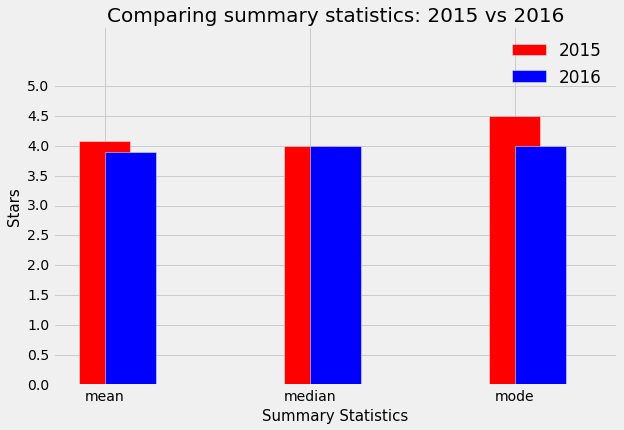

In [38]:
plt.style.use('fivethirtyeight')
summary["2015"].plot.bar(color = 'r', align = 'center', label = '2015', width = .25,figsize = (9,6))
summary["2016"].plot.bar(color = 'b', align = 'edge', label = '2016', width = .25, rot = 0)

plt.title('Comparing summary statistics: 2015 vs 2016', fontsize = 20)
plt.ylim(0,6)
plt.yticks(np.arange(0,5.1,step = 0.5))
plt.ylabel('Stars', fontsize = 15)
plt.xlabel('Summary Statistics', fontsize = 15)
plt.legend(framealpha = 0, loc = 'upper right')
plt.show()

From the grouped bar plot of summary statistics of both samples, we can make the following observations:

- The median is same for both the distributions
- The mode of 2016 distribution is lower by around 0.5 stars compared to 2015 distribution
- The mean of 2016 distribution is slightly lower than 2015 distribution

This concludes that there has been a change in fandango ratings after Hickey's Analysis in 2015. The popular movies on average got lesser ratings in 2016 than in 2015.
